# Introducción

La diabetes es una de las enfermedades crónicas más prevalentes y de mayor impacto en la salud pública a nivel mundial. Según la Organización Mundial de la Salud (OMS), el número de personas con diabetes ha ido aumentando significativamente en las últimas décadas debido al envejecimiento de la población, los estilos de vida sedentarios y los malos hábitos alimenticios.

La diabetes puede clasificarse principalmente en dos tipos: diabetes tipo 1, una enfermedad autoinmune que destruye las células productoras de insulina; y diabetes tipo 2, relacionada con factores como la obesidad y el estilo de vida. Es por esto que lña detección temprana y la clasificación de individuos en riesgo es clave para diseñar intervenciones preventivas y reducir las complicaciones asociadas con la enfermedad.

En este contexto, los modelos de aprendizaje automático (Machine Learning) ofrecen herramientas potentes para la clasificación y predicción, permitiendo analizar grandes volúmenes de datos y detectar patrones complejos que no son evidentes a simple vista.


# Descripción del Problema

En este trabajo, se analizará un [dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data) que contiene información de salud relacionada con factores de riesgo para la diabetes. Las variables incluyen datos como presión arterial alta, colesterol alto, índice de masa corporal (BMI), hábitos de estilo de vida (actividad física, consumo de frutas y verduras, tabaquismo), variables demográficas (edad, género, educación e ingresos) y condiciones preexistentes como enfermedades cardíacas o ataques.

# Objetivo

El objetivo principal de este estudio es desarrollar un clasificador basado en Machine Learning que permita predecir el riesgo de sufrir diabetes de un individuo utilizando las variables proporcionadas en el dataset.

Por tanto la variable objetivo será

Diabetes_012:

- 0: No diabetes

- 1: Prediabetes

- 2: Diabetes

[Data Description](https://docs.google.com/document/d/1HjRQVKGVoSnpBXQ_UG2nqgD5-y320KuIY4fnn_ZVDGQ/edit?usp=sharing)

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df = pd.read_csv("/content/drive/MyDrive/Coderhouse/Data Science I/PREENTREGRA - PROYECTO FINAL/diabetes_012_health_indicators_BRFSS2015.csv")

# Exploración de datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

- Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Se puede ver que el dataset tiene un total de 22 campos y 253.680 registros, son todas de tipo float64


In [54]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


**Variables relevantes**

En este caso estamos tratando con una variable relacionada a la salud, por lo cual teniendo en cuenta conocimientos previos relacionados a esto se sabe que algunas de las variables que tienen una alta relación con la diabetes y algunas que se relacionan entre si

- Edad - Enfermead coronaria
- Fumador - Enfermedad coronaria
- Dieta - Consumo de vegetales y frutas - Ingresos - Educación

Entre otras

Determinar si existe un desequilibrio en las clases (0 = No diabetes, 1 = Prediabetes, 2 = Diabetes).

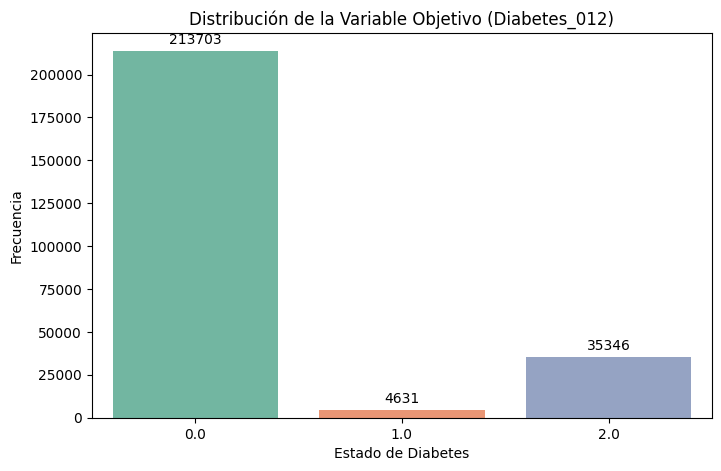

In [55]:
# Gráfico de barras para la variable objetivo
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Diabetes_012', data=df, hue='Diabetes_012', palette='Set2', legend=False)  # Definir ax
plt.title('Distribución de la Variable Objetivo (Diabetes_012)')
plt.xlabel('Estado de Diabetes')
plt.ylabel('Frecuencia')

# Agregar valores numéricos encima de las barras
for p in ax.patches:  # Referenciar ax.patches
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


Se puede notar que hay un gran desbalance de clases, esto puede llegar a ser un problema al futuro cuando se desee realizar modelos de machine learning, debido al overfitting. Llegado el momento habrá que utilizar algún metodo de regularización para el balance de clases

Se plantea un analisis con una **matriz de correlación de Pearso**n, para explorar de forma global estos datos, sin embargo hay que tener en cuenta que este analisis lineal entre variables que en algunos casos no es el más adecuado.

Los valores del Coeficiente de Correlación de Pearson son los siguientes

- +1: Correlación positiva perfecta (aumenta una variable, aumenta la otra).
- -1: Correlación negativa perfecta (aumenta una variable, disminuye la otra).
- 0: No hay correlación lineal.

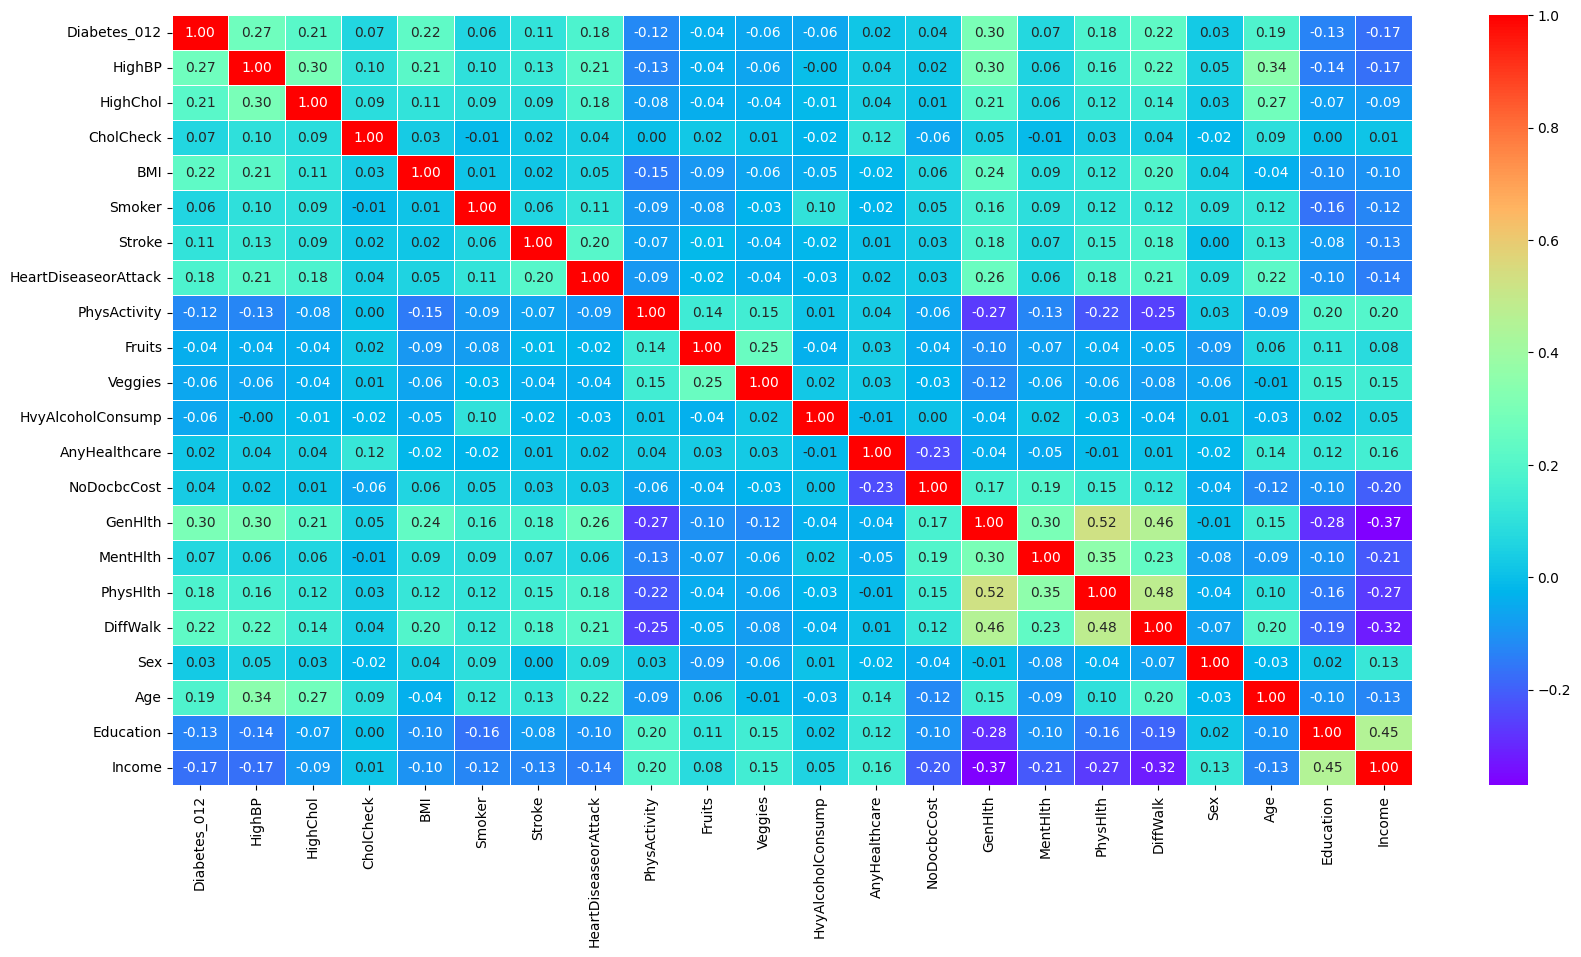

In [56]:
# Grafica de correlacion
# paleta de colores para graficar la matriz Espectrograma 'PiYG', 'plasma', 'magma','inferno',' viridis', 'hot', 'jet', 'rainbow', 'nipy_spectralr' , 'muted'
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f', ax=ax, cmap='rainbow')
plt.show()


De manera general, se puede observar lo siguiente:

- A medida que aumenta el nivel de educación, disminuye el riesgo de padecer diabetes. Además, un mayor nivel educativo está asociado a un aumento en los ingresos.

- El riesgo de padecer diabetes tiende a incrementarse con la edad.

- El consumo de frutas y verduras está relacionado con una disminución en el riesgo de padecer diabetes.

- El índice de masa corporal (BMI) se asocia con un mayor riesgo de desarrollar diabetes. A su vez, un BMI elevado está vinculado a una menor ingesta de frutas y verduras, así como a niveles más bajos de educación e ingresos.

- Un nivel elevado de presión arterial se relaciona con un mayor riesgo de padecer diabetes.

**Se analizan estas variables mas a detalle**

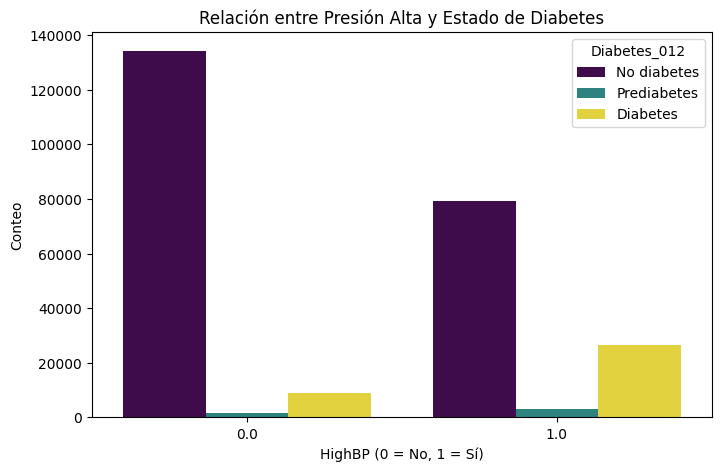

In [57]:
# Gráfico de barras: HighBP vs Diabetes_012
plt.figure(figsize=(8, 5))
sns.countplot(x='HighBP', hue='Diabetes_012', data=df, palette='viridis')
plt.title('Relación entre Presión Alta y Estado de Diabetes')
plt.xlabel('HighBP (0 = No, 1 = Sí)')
plt.ylabel('Conteo')
plt.legend(title='Diabetes_012', loc='upper right', labels=['No diabetes', 'Prediabetes', 'Diabetes'])
plt.show()


Se puede observar que aquellos individuos que poseen un nivel alto de presión arterial, son aquellos más propensos a tener diabetes o prediabetes. Sin embargo se obsrva una gran cantidad de sujetos sin diabetes tanto para el caso de no poseer alta presion arterial como teniendo presion arterial alta, esto se debe a lo visto anteriormente, es decir, a ese desbalance de clases mencionado.



In [67]:
import pandas as pd

# Contar el número de elementos de cada clase
class_counts = df['Diabetes_012'].value_counts()

# Determinar el número de elementos que debe tener cada clase (el mínimo número de clases)
min_class_count = class_counts.min()

# Crear un nuevo DataFrame con igual número de elementos por clase
balanced_df = pd.concat([
    df[df['Diabetes_012'] == label].sample(min_class_count, random_state=42)
    for label in class_counts.index
])

# Verificar el nuevo balance de clases
print(balanced_df['Diabetes_012'].value_counts())



Diabetes_012
0.0    4631
2.0    4631
1.0    4631
Name: count, dtype: int64


In [59]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13893 entries, 162288 to 41994
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          13893 non-null  float64
 1   HighBP                13893 non-null  float64
 2   HighChol              13893 non-null  float64
 3   CholCheck             13893 non-null  float64
 4   BMI                   13893 non-null  float64
 5   Smoker                13893 non-null  float64
 6   Stroke                13893 non-null  float64
 7   HeartDiseaseorAttack  13893 non-null  float64
 8   PhysActivity          13893 non-null  float64
 9   Fruits                13893 non-null  float64
 10  Veggies               13893 non-null  float64
 11  HvyAlcoholConsump     13893 non-null  float64
 12  AnyHealthcare         13893 non-null  float64
 13  NoDocbcCost           13893 non-null  float64
 14  GenHlth               13893 non-null  float64
 15  MentHlth           

Se realiza un balance de clases unicamente con fines didacticos para poder analizar los distintos parámetros de una forma más clara, ya que esta gran diferencia entre los datos complica la visualización del comportamiento de los mismos

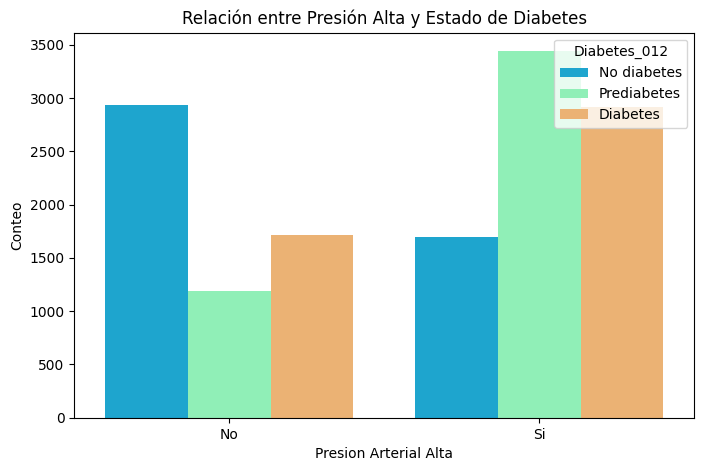

In [78]:
# Gráfico de barras: HighBP vs Diabetes_012
plt.figure(figsize=(8, 5))

# Mapeo para presion arterial alta
highbp_mapping = {
    0: 'No',
    1: 'Si',
}

balanced_df['HighBP'] = balanced_df['HighBP'].replace(highbp_mapping)

sns.countplot(x='HighBP', hue='Diabetes_012', data=balanced_df, palette='rainbow')
plt.title('Relación entre Presión Alta y Estado de Diabetes')
plt.xlabel('Presion Arterial Alta')
plt.ylabel('Conteo')
plt.legend(title='Diabetes_012', loc='upper right', labels=['No diabetes', 'Prediabetes', 'Diabetes'])
plt.show()


Ya con el dataset "balanceado" se puede observar este efecto que se mencionó anteriormente pero de una forma mucho más clara


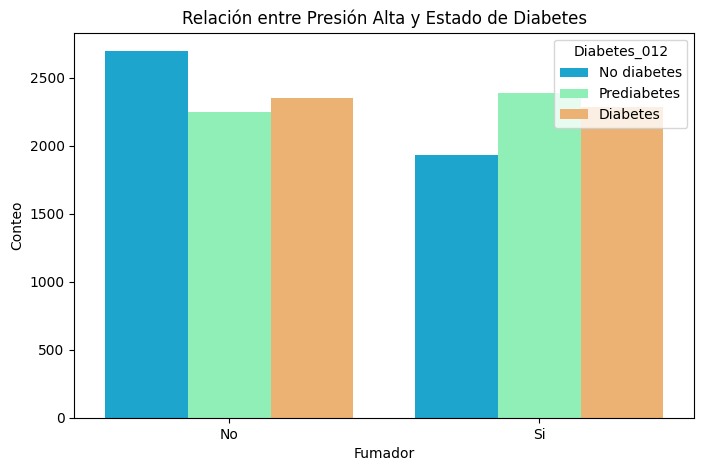

In [77]:
# Gráfico de barras: Smoker vs Diabetes_012
plt.figure(figsize=(8, 5))

# Mapeo para fumadores
smoker_mapping = {
    0: 'No',
    1: 'Si',
}

balanced_df['Smoker'] = balanced_df['Smoker'].replace(smoker_mapping)

sns.countplot(x='Smoker', hue='Diabetes_012', data=balanced_df, palette='rainbow')
plt.title('Relación entre Presión Alta y Estado de Diabetes')
plt.xlabel('Fumador')
plt.ylabel('Conteo')
plt.legend(title='Diabetes_012', loc='upper right', labels=['No diabetes', 'Prediabetes', 'Diabetes'])
plt.show()


Se observa que los pacientes fumadores son aquellos que tienen una tendencia mayor a ser diabeticos


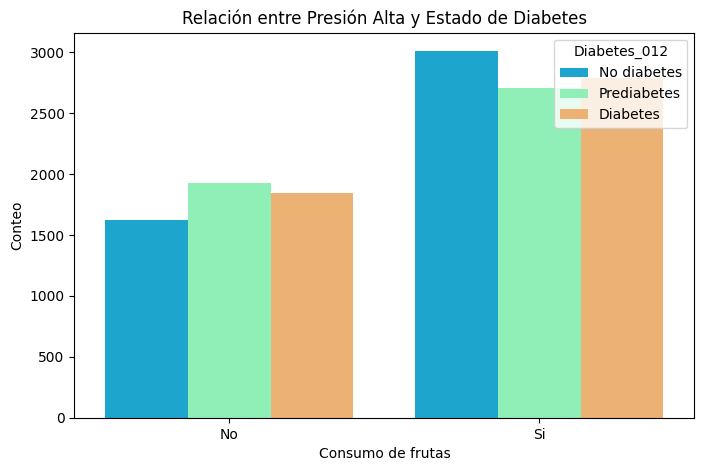

In [71]:
# Gráfico de barras: Fruits vs Diabetes_012
plt.figure(figsize=(8, 5))

# Mapeo para frutas
fruits_mapping = {
    0: 'No',
    1: 'Si',
}

balanced_df['Fruits'] = balanced_df['Fruits'].replace(fruits_mapping)

sns.countplot(x='Fruits', hue='Diabetes_012', data=balanced_df, palette='rainbow')
plt.title('Relación entre Presión Alta y Estado de Diabetes')
plt.xlabel('Consumo de frutas')
plt.ylabel('Conteo')
plt.legend(title='Diabetes_012', loc='upper right', labels=['No diabetes', 'Prediabetes', 'Diabetes'])
plt.show()


Se puede ver como una dieta saludable, en este caso la incorporación del consumo de frutas puede ayudar a reducir el riesgo de padecer diabetes

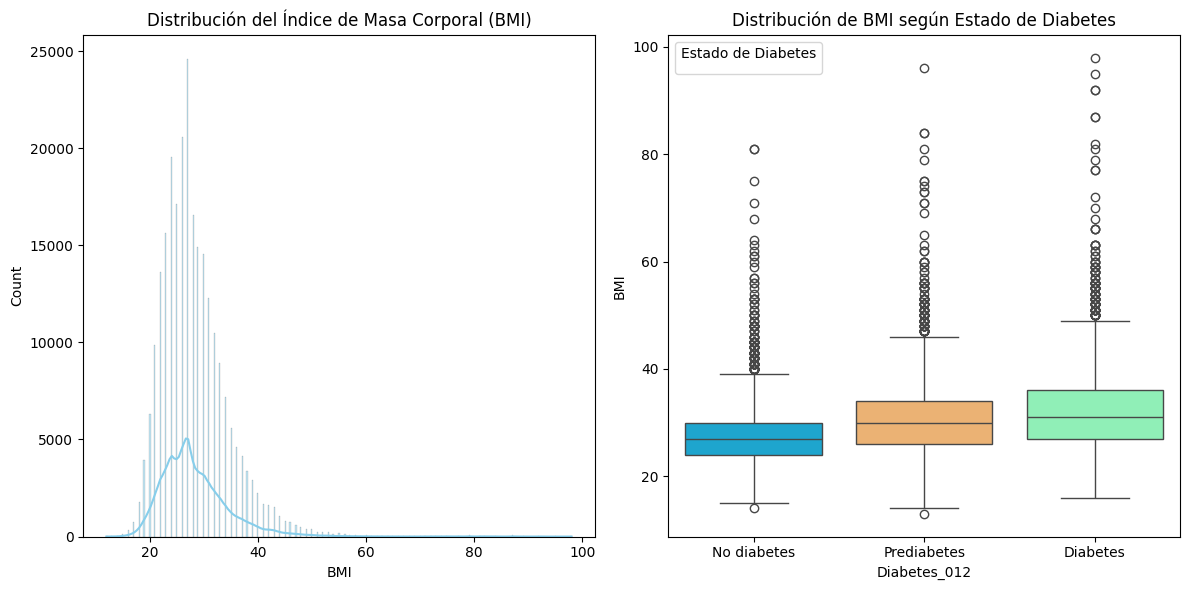

In [76]:
plt.figure(figsize=(12, 6))

# Mapeo para diabetes
diabetes_mapping = {
    0: 'No diabetes',
    1: 'Prediabetes',
    2: 'Diabetes'
}

balanced_df['Diabetes_012'] = balanced_df['Diabetes_012'].replace(diabetes_mapping)

# Histograma de BMI
plt.subplot(1, 2, 1)
sns.histplot(df['BMI'], kde=True, color='skyblue')
plt.title('Distribución del Índice de Masa Corporal (BMI)')

# Boxplot de BMI por Diabetes_012 con orden personalizado
plt.subplot(1, 2, 2)
sns.boxplot(
    x='Diabetes_012',
    y='BMI',
    data=balanced_df,
    hue='Diabetes_012',
    palette='rainbow',
    order=['No diabetes', 'Prediabetes', 'Diabetes']  # Orden explícito
)
plt.title('Distribución de BMI según Estado de Diabetes')
plt.legend(title='Estado de Diabetes', loc='upper left')

plt.tight_layout()
plt.show()


Se puede ver que la mayor cantidad de valores se concentra entre 20 y 40.

Se pueden observar bastantes outliers, esto tiene sentido ya que viendo valores normales dados por la Organización Mundial de la Salud, se tienen los valores que se presentan en la tabla.

Estos Outliers luego hay que filtrarlos al momento de realizar los modelos de predicción

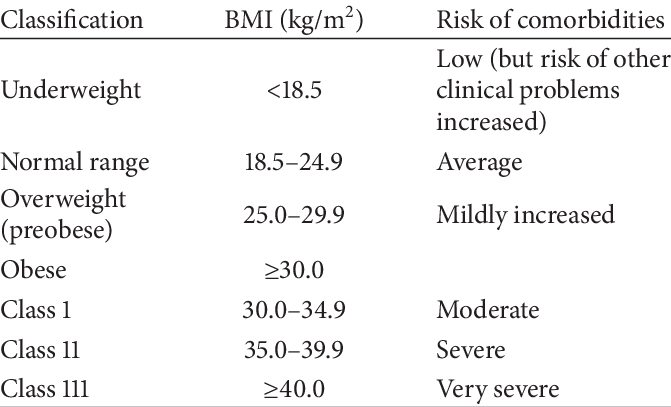

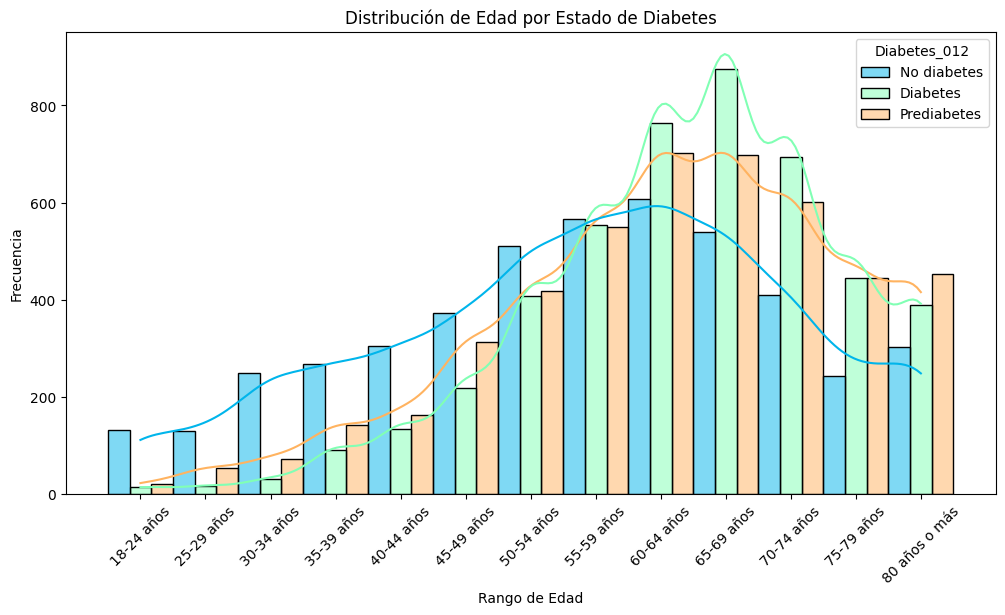

In [69]:
# Mapeo para la edad
age_mapping = {
    1: '18-24 años', 2: '25-29 años', 3: '30-34 años', 4: '35-39 años', 5: '40-44 años', 6: '45-49 años', 7: '50-54 años', 8: '55-59 años',
    9: '60-64 años', 10: '65-69 años', 11: '70-74 años', 12: '75-79 años', 13: '80 años o más'
}

# Mapeo para diabetes
diabetes_mapping = {
    0: 'No diabetes',
    1: 'Prediabetes',
    2: 'Diabetes'
}

# Reemplazo de valores en el DataFrame
balanced_df['Age'] = balanced_df['Age'].replace(age_mapping)
balanced_df['Diabetes_012'] = balanced_df['Diabetes_012'].replace(diabetes_mapping)

# Ordenar las categorías de la columna 'Age'
age_order = [
    '18-24 años', '25-29 años', '30-34 años', '35-39 años', '40-44 años', '45-49 años',
    '50-54 años', '55-59 años', '60-64 años', '65-69 años', '70-74 años', '75-79 años', '80 años o más'
]
balanced_df['Age'] = pd.Categorical(balanced_df['Age'], categories=age_order, ordered=True)

# Histograma para Edad por Estado de Diabetes
plt.figure(figsize=(12, 6))

# Histogramas separados
sns.histplot(data=balanced_df, x='Age', hue='Diabetes_012', multiple='dodge', palette='rainbow', kde=True)
plt.title('Distribución de Edad por Estado de Diabetes')
plt.xlabel('Rango de Edad')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.show()


Se observa como el riesgo de padecer diabetes o prediabetes aumenta con la edad, alcanzando su pico maximo en el rango 10, el cual se corresponde con un rango etareo de 65 a 69 años


In [66]:
print("Distribución para No Diabetes:", no_diabetes_dist)
print("Distribución para Prediabetes:", prediabetes_dist)
print("Distribución para Diabetes:", diabetes_dist)


Distribución para No Diabetes: [0, 0]
Distribución para Prediabetes: [2027, 2604]
Distribución para Diabetes: [2231, 2400]


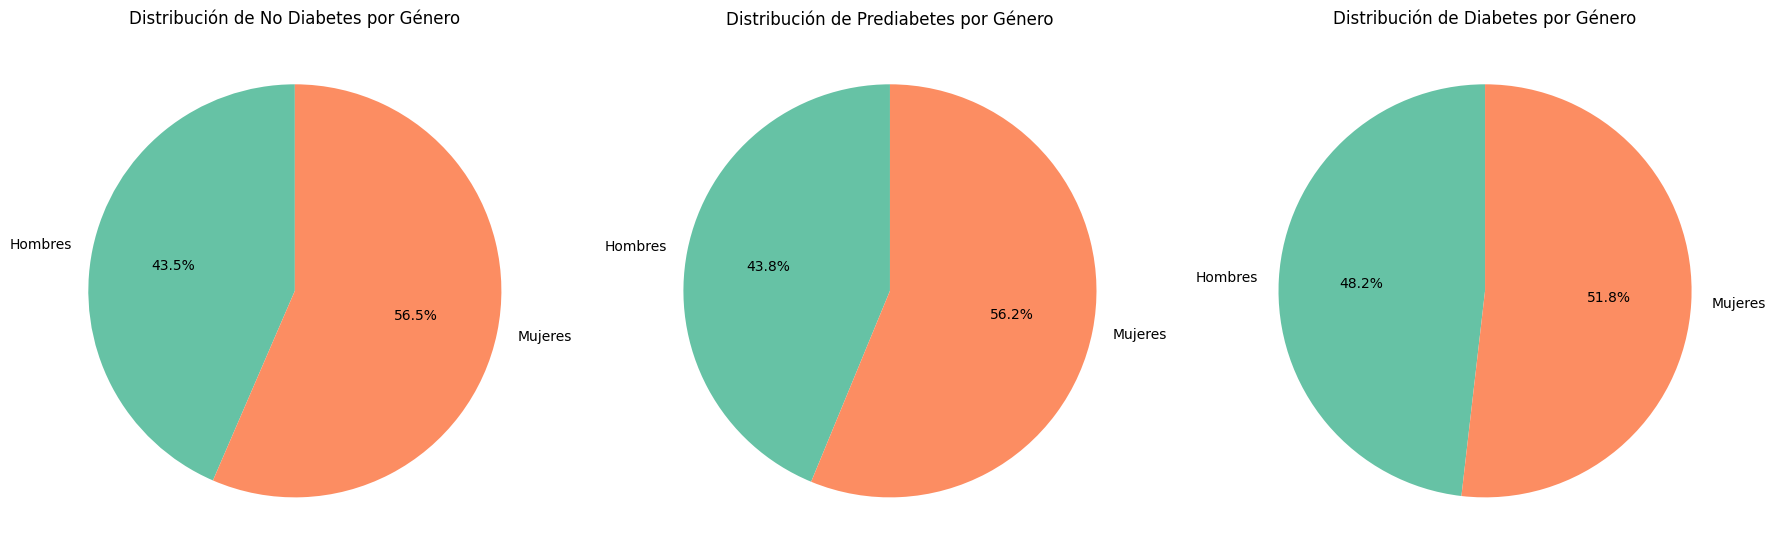

In [68]:
# Filtramos los datos para hombres y mujeres
df_men = balanced_df[balanced_df['Sex'] == 1]  # Hombres
df_women = balanced_df[balanced_df['Sex'] == 0]  # Mujeres

# Definir los nombres correspondientes a los valores de Diabetes_012
diabetes_labels = {0: 'No Diabetes', 1: 'Prediabetes', 2: 'Diabetes'}

# Contamos la distribución de diabetes por género para cada categoría
men_diabetes_dist = df_men['Diabetes_012'].value_counts()
women_diabetes_dist = df_women['Diabetes_012'].value_counts()

# Mapear los valores de diabetes a sus etiquetas
men_diabetes_dist.index = men_diabetes_dist.index.map(diabetes_labels)
women_diabetes_dist.index = women_diabetes_dist.index.map(diabetes_labels)

# Configuración de la figura y los subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Gráfico de torta para No Diabetes
no_diabetes_dist = [men_diabetes_dist.get('No Diabetes', 0), women_diabetes_dist.get('No Diabetes', 0)]
axes[0].pie(no_diabetes_dist, labels=['Hombres', 'Mujeres'], autopct='%1.1f%%', colors=sns.color_palette('Set2', n_colors=2), startangle=90)
axes[0].set_title('Distribución de No Diabetes por Género')

# Gráfico de torta para Prediabetes
prediabetes_dist = [men_diabetes_dist.get('Prediabetes', 0), women_diabetes_dist.get('Prediabetes', 0)]
axes[1].pie(prediabetes_dist, labels=['Hombres', 'Mujeres'], autopct='%1.1f%%', colors=sns.color_palette('Set2', n_colors=2), startangle=90)
axes[1].set_title('Distribución de Prediabetes por Género')

# Gráfico de torta para Diabetes
diabetes_dist = [men_diabetes_dist.get('Diabetes', 0), women_diabetes_dist.get('Diabetes', 0)]
axes[2].pie(diabetes_dist, labels=['Hombres', 'Mujeres'], autopct='%1.1f%%', colors=sns.color_palette('Set2', n_colors=2), startangle=90)
axes[2].set_title('Distribución de Diabetes por Género')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


No se observa una relación clara entre el padecimiento de diabetes y el genero
